### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading Dataset and analysing it

In [2]:
import openml
dataset = openml.datasets.get_dataset(1477)
dataset

OpenML Dataset
Name..........: gas-drift-different-concentrations
Version.......: 1
Format........: ARFF
Upload Date...: 2015-05-22 20:18:53
Licence.......: Public
Download URL..: https://www.openml.org/data/v1/download/1588716/gas-drift-different-concentrations.arff
OpenML URL....: https://www.openml.org/d/1477
# of features.: 130
# of instances: 13910

In [3]:
data, target, categorical_indicator, attribute_names = dataset.get_data(dataset_format="dataframe", target=dataset.default_target_attribute)

In [4]:
data

V1         V2         V3         V4         V5         V6  \
0      12285.6582   4.076635   4.842317   7.509393  10.822436  -1.312657   
1        -35.6889   0.993944   0.166099   0.489363   3.484663  -0.130298   
2      63927.2217  14.956941  19.971376  29.188512  33.291320 -10.433776   
3       2992.9019   1.380553   0.808910   1.288259   4.660135  -0.755903   
4      57524.7812  11.912566  14.631496  19.809240  23.715868  -9.084750   
...           ...        ...        ...        ...        ...        ...   
13905  13384.8262   2.820931   4.007378   6.618008  11.386095  -2.142994   
13906  13382.9619   2.825174   4.010915   6.483989  10.356127  -2.156512   
13907  13336.8725   2.822288   3.980818   6.487103  10.936979  -2.146688   
13908  13351.1318   2.824358   3.987819   6.554427  11.331002  -2.143651   
13909  13314.9336   2.816502   3.982182   6.620679  11.848481  -2.138961   

              V7         V8          V9        V10  ...       V120  \
0      -1.853717  -6.924985  11800.9233   4.483500  ...  -3.440387   
1      -0.528364  -3.735347    266.4145   1.053988  ...  -4.482534   
2     -16.062245 -49.490143  57405.8483  15.613843  ... -25.150090   
3      -1.120470  -4.075213   4301.4033   1.652701  ...  -7.215792   
4     -11.770585 -39.234003  50051.0703  11.732548  ... -10.248794   
...          ...        ...         ...        ...  ...        ...   
13905  -3.110327 -11.296786  19013.4575   4.050907  ...  -8.012662   
13906  -3.179563 -10.184803  19034.2495   4.066463  ...  -6.943002   
13907  -3.273109 -11.067489  18997.7222   4.055524  ...  -7.777268   
13908  -3.257854 -11.795109  19035.9926   4.071607  ...  -6.890286   
13909  -3.259621 -11.065998  18973.1426   4.048421  ...  -7.411470   

             V121      V122      V123       V124       V125      V126  \
0       1784.5324  1.907000  1.729200   4.881194   8.623828 -0.314110   
1        904.9898  1.433707  1.068069   2.532958   5.369720 -0.183779   
2      14585.7879  8.189021  6.099452  12.127991  15.709651 -3.887082   
3       6044.5554  3.488295  2.662288   5.938297   8.544508 -1.567322   
4      10580.1006  5.752675  3.880740   8.545897  11.831716 -2.655521   
...           ...       ...       ...        ...        ...       ...   
13905   7548.3501  2.377836  3.400734   8.571174  11.555882 -1.617656   
13906   7510.4946  2.364505  3.401381   8.512949  12.149638 -1.613554   
13907   7530.0010  2.369898  3.400592   8.494436  11.839013 -1.612525   
13908   7599.0201  2.391834  3.358804   8.457260  11.297346 -1.606879   
13909   7485.3593  2.358200  3.397591   8.570913  13.110304 -1.630569   

           V127       V128   V129  
0     -0.661556  -3.521663   10.0  
1     -0.534087  -4.635975   50.0  
2     -6.731473 -19.326895  250.0  
3     -2.701235  -6.472439  600.0  
4     -4.312744  -8.510591  150.0  
...         ...        ...    ...  
13905 -2.457614  -6.226359   10.0  
13906 -2.493870  -6.859804   10.0  
13907 -2.504918  -6.263872   10.0  
13908 -2.438701  -6.044784   10.0  
13909 -2.463957  -5.726544   10.0  

[13910 rows x 129 columns]

In [5]:
target

0        4
1        3
2        4
3        3
4        4
        ..
13905    6
13906    6
13907    6
13908    6
13909    6
Name: Class, Length: 13910, dtype: category
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]

### PDA of Dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910 entries, 0 to 13909
Columns: 129 entries, V1 to V129
dtypes: float64(129)
memory usage: 13.7 MB


In [7]:
data.isnull().sum()

V1      0
V2      0
V3      0
V4      0
V5      0
       ..
V125    0
V126    0
V127    0
V128    0
V129    0
Length: 129, dtype: int64

In [12]:
target.value_counts(sort=False)

1    2565
2    2926
3    1641
4    1936
5    3009
6    1833
Name: Class, dtype: int64

In [13]:
target.unique()

[4, 3, 6, 2, 1, 5]
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]

In [14]:
y = target

In [15]:
X = data
X

V1         V2         V3         V4         V5         V6  \
0      12285.6582   4.076635   4.842317   7.509393  10.822436  -1.312657   
1        -35.6889   0.993944   0.166099   0.489363   3.484663  -0.130298   
2      63927.2217  14.956941  19.971376  29.188512  33.291320 -10.433776   
3       2992.9019   1.380553   0.808910   1.288259   4.660135  -0.755903   
4      57524.7812  11.912566  14.631496  19.809240  23.715868  -9.084750   
...           ...        ...        ...        ...        ...        ...   
13905  13384.8262   2.820931   4.007378   6.618008  11.386095  -2.142994   
13906  13382.9619   2.825174   4.010915   6.483989  10.356127  -2.156512   
13907  13336.8725   2.822288   3.980818   6.487103  10.936979  -2.146688   
13908  13351.1318   2.824358   3.987819   6.554427  11.331002  -2.143651   
13909  13314.9336   2.816502   3.982182   6.620679  11.848481  -2.138961   

              V7         V8          V9        V10  ...       V120  \
0      -1.853717  -6.924985  11800.9233   4.483500  ...  -3.440387   
1      -0.528364  -3.735347    266.4145   1.053988  ...  -4.482534   
2     -16.062245 -49.490143  57405.8483  15.613843  ... -25.150090   
3      -1.120470  -4.075213   4301.4033   1.652701  ...  -7.215792   
4     -11.770585 -39.234003  50051.0703  11.732548  ... -10.248794   
...          ...        ...         ...        ...  ...        ...   
13905  -3.110327 -11.296786  19013.4575   4.050907  ...  -8.012662   
13906  -3.179563 -10.184803  19034.2495   4.066463  ...  -6.943002   
13907  -3.273109 -11.067489  18997.7222   4.055524  ...  -7.777268   
13908  -3.257854 -11.795109  19035.9926   4.071607  ...  -6.890286   
13909  -3.259621 -11.065998  18973.1426   4.048421  ...  -7.411470   

             V121      V122      V123       V124       V125      V126  \
0       1784.5324  1.907000  1.729200   4.881194   8.623828 -0.314110   
1        904.9898  1.433707  1.068069   2.532958   5.369720 -0.183779   
2      14585.7879  8.189021  6.099452  12.127991  15.709651 -3.887082   
3       6044.5554  3.488295  2.662288   5.938297   8.544508 -1.567322   
4      10580.1006  5.752675  3.880740   8.545897  11.831716 -2.655521   
...           ...       ...       ...        ...        ...       ...   
13905   7548.3501  2.377836  3.400734   8.571174  11.555882 -1.617656   
13906   7510.4946  2.364505  3.401381   8.512949  12.149638 -1.613554   
13907   7530.0010  2.369898  3.400592   8.494436  11.839013 -1.612525   
13908   7599.0201  2.391834  3.358804   8.457260  11.297346 -1.606879   
13909   7485.3593  2.358200  3.397591   8.570913  13.110304 -1.630569   

           V127       V128   V129  
0     -0.661556  -3.521663   10.0  
1     -0.534087  -4.635975   50.0  
2     -6.731473 -19.326895  250.0  
3     -2.701235  -6.472439  600.0  
4     -4.312744  -8.510591  150.0  
...         ...        ...    ...  
13905 -2.457614  -6.226359   10.0  
13906 -2.493870  -6.859804   10.0  
13907 -2.504918  -6.263872   10.0  
13908 -2.438701  -6.044784   10.0  
13909 -2.463957  -5.726544   10.0  

[13910 rows x 129 columns]

### Understanding correlation between the features

In [16]:
data.corr()

V1        V2        V3        V4        V5        V6        V7  \
V1    1.000000  0.197385  0.983710  0.964275  0.852414 -0.951382 -0.882787   
V2    0.197385  1.000000  0.221950  0.232599  0.172611 -0.203149 -0.175007   
V3    0.983710  0.221950  1.000000  0.992760  0.876528 -0.944900 -0.883919   
V4    0.964275  0.232599  0.992760  1.000000  0.900978 -0.927958 -0.878868   
V5    0.852414  0.172611  0.876528  0.900978  1.000000 -0.788019 -0.810009   
...        ...       ...       ...       ...       ...       ...       ...   
V125  0.097713  0.227359  0.148007  0.176846  0.218291 -0.092880 -0.144618   
V126 -0.520602 -0.243217 -0.557404 -0.566290 -0.537111  0.577353  0.636197   
V127 -0.473974 -0.223689 -0.510671 -0.526193 -0.519817  0.536064  0.633909   
V128 -0.319290 -0.132333 -0.347064 -0.372958 -0.427085  0.375383  0.538994   
V129  0.320509  0.099679  0.337050  0.342584  0.392268 -0.278865 -0.341064   

            V8        V9       V10  ...      V120      V121      V122  \
V1   -0.677211  0.925908  0.109630  ... -0.318420  0.584990  0.364002   
V2   -0.093077  0.199855  0.311957  ... -0.126975  0.265716  0.237435   
V3   -0.682115  0.908774  0.125443  ... -0.344844  0.622557  0.389360   
V4   -0.685374  0.890924  0.132648  ... -0.369974  0.631761  0.397698   
V5   -0.729528  0.810652  0.095071  ... -0.431462  0.597039  0.380994   
...        ...       ...       ...  ...       ...       ...       ...   
V125 -0.182252  0.133775  0.127202  ... -0.473641  0.716674  0.613635   
V126  0.669424 -0.596343 -0.156014  ...  0.745990 -0.902724 -0.718450   
V127  0.716637 -0.552762 -0.143128  ...  0.857957 -0.843105 -0.700223   
V128  0.720570 -0.405216 -0.090363  ...  0.983216 -0.583434 -0.491367   
V129 -0.434605  0.405556  0.063252  ... -0.497967  0.553294  0.557073   

          V123      V124      V125      V126      V127      V128      V129  
V1    0.364573  0.116011  0.097713 -0.520602 -0.473974 -0.319290  0.320509  
V2    0.276329  0.361492  0.227359 -0.243217 -0.223689 -0.132333  0.099679  
V3    0.419206  0.166136  0.148007 -0.557404 -0.510671 -0.347064  0.337050  
V4    0.440495  0.190516  0.176846 -0.566290 -0.526193 -0.372958  0.342584  
V5    0.433582  0.198069  0.218291 -0.537111 -0.519817 -0.427085  0.392268  
...        ...       ...       ...       ...       ...       ...       ...  
V125  0.905574  0.977929  1.000000 -0.667929 -0.649437 -0.471436  0.347610  
V126 -0.857785 -0.678950 -0.667929  1.000000  0.969151  0.733523 -0.568857  
V127 -0.819201 -0.654818 -0.649437  0.969151  1.000000  0.847394 -0.583447  
V128 -0.582082 -0.458414 -0.471436  0.733523  0.847394  1.000000 -0.485145  
V129  0.530408  0.347679  0.347610 -0.568857 -0.583447 -0.485145  1.000000  

[129 rows x 129 columns]

### Feature Selection

The Below section focuses on feature selection based on 3 methods that are generally used:
- Feature Importance
- Information gain (multi_info_classif_)
- Removing Multicollinear features

The results if taken in account can help in reducing the number of input vatriables. We can decide how many fearures to take moving forward with model traning based on their impoetace value. 

#### a. Feature Importance

In this we are using Extra Tree Classifier. This class implements a meta estimator that fits a number of
randomized decision trees (a.k.a. extra-trees) on various sub-samples
of the dataset and uses averaging to improve the predictive accuracy
and control over-fitting.

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
y.shape, X.shape
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [18]:
X

V1         V2         V3         V4         V5         V6  \
0      12285.6582   4.076635   4.842317   7.509393  10.822436  -1.312657   
1        -35.6889   0.993944   0.166099   0.489363   3.484663  -0.130298   
2      63927.2217  14.956941  19.971376  29.188512  33.291320 -10.433776   
3       2992.9019   1.380553   0.808910   1.288259   4.660135  -0.755903   
4      57524.7812  11.912566  14.631496  19.809240  23.715868  -9.084750   
...           ...        ...        ...        ...        ...        ...   
13905  13384.8262   2.820931   4.007378   6.618008  11.386095  -2.142994   
13906  13382.9619   2.825174   4.010915   6.483989  10.356127  -2.156512   
13907  13336.8725   2.822288   3.980818   6.487103  10.936979  -2.146688   
13908  13351.1318   2.824358   3.987819   6.554427  11.331002  -2.143651   
13909  13314.9336   2.816502   3.982182   6.620679  11.848481  -2.138961   

              V7         V8          V9        V10  ...       V120  \
0      -1.853717  -6.924985  11800.9233   4.483500  ...  -3.440387   
1      -0.528364  -3.735347    266.4145   1.053988  ...  -4.482534   
2     -16.062245 -49.490143  57405.8483  15.613843  ... -25.150090   
3      -1.120470  -4.075213   4301.4033   1.652701  ...  -7.215792   
4     -11.770585 -39.234003  50051.0703  11.732548  ... -10.248794   
...          ...        ...         ...        ...  ...        ...   
13905  -3.110327 -11.296786  19013.4575   4.050907  ...  -8.012662   
13906  -3.179563 -10.184803  19034.2495   4.066463  ...  -6.943002   
13907  -3.273109 -11.067489  18997.7222   4.055524  ...  -7.777268   
13908  -3.257854 -11.795109  19035.9926   4.071607  ...  -6.890286   
13909  -3.259621 -11.065998  18973.1426   4.048421  ...  -7.411470   

             V121      V122      V123       V124       V125      V126  \
0       1784.5324  1.907000  1.729200   4.881194   8.623828 -0.314110   
1        904.9898  1.433707  1.068069   2.532958   5.369720 -0.183779   
2      14585.7879  8.189021  6.099452  12.127991  15.709651 -3.887082   
3       6044.5554  3.488295  2.662288   5.938297   8.544508 -1.567322   
4      10580.1006  5.752675  3.880740   8.545897  11.831716 -2.655521   
...           ...       ...       ...        ...        ...       ...   
13905   7548.3501  2.377836  3.400734   8.571174  11.555882 -1.617656   
13906   7510.4946  2.364505  3.401381   8.512949  12.149638 -1.613554   
13907   7530.0010  2.369898  3.400592   8.494436  11.839013 -1.612525   
13908   7599.0201  2.391834  3.358804   8.457260  11.297346 -1.606879   
13909   7485.3593  2.358200  3.397591   8.570913  13.110304 -1.630569   

           V127       V128   V129  
0     -0.661556  -3.521663   10.0  
1     -0.534087  -4.635975   50.0  
2     -6.731473 -19.326895  250.0  
3     -2.701235  -6.472439  600.0  
4     -4.312744  -8.510591  150.0  
...         ...        ...    ...  
13905 -2.457614  -6.226359   10.0  
13906 -2.493870  -6.859804   10.0  
13907 -2.504918  -6.263872   10.0  
13908 -2.438701  -6.044784   10.0  
13909 -2.463957  -5.726544   10.0  

[13910 rows x 129 columns]

In [19]:
print(model.feature_importances_)

[0.01143418 0.00534456 0.00866148 0.00969543 0.0048268  0.00774483
 0.00429599 0.00666095 0.03213562 0.00594329 0.02131978 0.01823764
 0.01145571 0.01664924 0.01250078 0.01053756 0.0116495  0.00724142
 0.00811106 0.00691231 0.00308047 0.00643148 0.0039371  0.00254685
 0.01052557 0.00628952 0.00681387 0.00605293 0.00292606 0.00319198
 0.00311939 0.00234078 0.00651487 0.00490517 0.00755922 0.0114011
 0.00386673 0.00526715 0.00462293 0.00252418 0.0079576  0.00600138
 0.00675159 0.01347269 0.0031981  0.00465054 0.00262582 0.00216464
 0.0062488  0.00498595 0.00495231 0.00853953 0.00353575 0.00382582
 0.00245832 0.00228814 0.00682229 0.00356243 0.00558248 0.00899515
 0.00398749 0.00262902 0.00208311 0.00182473 0.01991337 0.00774596
 0.01651671 0.0222391  0.00966748 0.01089444 0.01418011 0.0069512
 0.01714629 0.0064873  0.00882244 0.01274339 0.01090168 0.01236775
 0.00739218 0.00826664 0.01248644 0.00704307 0.00716474 0.01285658
 0.00689401 0.00782531 0.00413055 0.00173465 0.00682951 0.006585

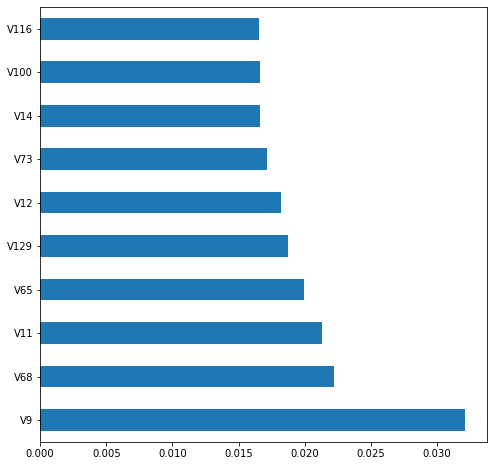

In [20]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh',figsize = (8,8))
plt.show()

#### b.Information Gain

Mutual information (MI) between two random variables is a non-negative
value, which measures the dependency between the variables. It is equal
to zero if and only if two random variables are independent, and higher
values mean higher dependency.

In [21]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,y)
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

V65     0.723315
V67     0.715809
V73     0.706429
V9      0.691388
V70     0.690951
          ...   
V56     0.144726
V112    0.121998
V104    0.120857
V40     0.118518
V48     0.097516
Length: 129, dtype: float64

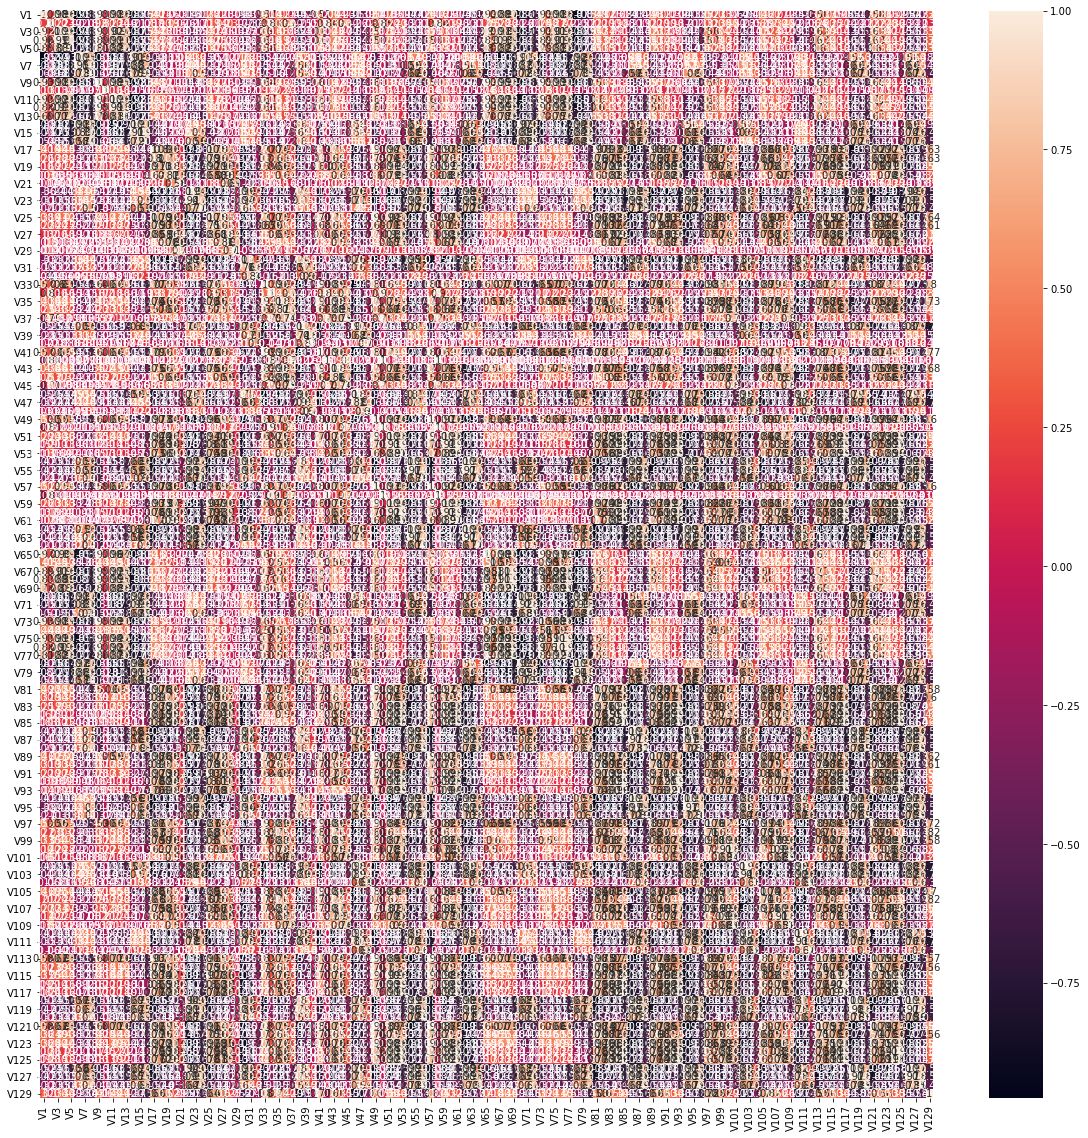

In [22]:
import seaborn as sns
corr= X.corr()
top_features=corr.index
plt.figure(figsize=(20,20))
sns.heatmap(X[top_features].corr(),annot=True)

#### c. Removing Multi collinear features

It is very necessary to remove one of multi collinear features because using both would not give any extra benefit to the model training and infact ince=rease the training time and redundancy. 

Threshold can be any value according to a domian expert person and can conside based on co-relattion plot. Another efficient way is to plot a ROC AUC cureve or check ROC AUC curve value and then set that value as a threshold to get the multicollinear features. In the following case I have taken a random thershold value and shown how we can find multicollinear feature and use or remove them according to the need.

In [23]:
threshold=0.9464042352548901
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
correlation(X,threshold)

{'V102',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V11',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V12',
 'V121',
 'V122',
 'V123',
 'V124',
 'V125',
 'V126',
 'V127',
 'V128',
 'V25',
 'V27',
 'V3',
 'V30',
 'V4',
 'V41',
 'V43',
 'V44',
 'V45',
 'V46',
 'V49',
 'V50',
 'V51',
 'V53',
 'V54',
 'V55',
 'V57',
 'V58',
 'V59',
 'V6',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V67',
 'V68',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96'}

Here the feature selection section ends. Selecting accurate features would help improve accuracy of the models but I have not selected any features yet as this project mainly aims on focusing on Classification study. 

### Feature Engineering and data preparation

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Data Modelling and Hyper parameter Tunning

### 1. Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=50)

In [28]:
y_pred=classifier.predict(X_test)
y_pred_proba = classifier.predict_proba(X_test)

In [29]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report, f1_score, roc_auc_score
from sklearn import metrics
def model_stats(y_test, y_pred):
    print(confusion_matrix(y_test,y_pred))
    print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
    print("Classification report: {}".format(classification_report(y_test,y_pred)))
    print("F1 Score {}".format(f1_score(y_test,y_pred, average='weighted')))

In [30]:
model_stats(y_test,y_pred)

[[777   0   0   1   0   0]
 [  1 871   1   0   1   0]
 [  1   5 476   0   8   0]
 [  3   0   0 571   1   3]
 [  0   0   1   4 911   0]
 [  2   0   0   2   4 529]]
Accuracy Score 0.9908938413611311
Classification report:               precision    recall  f1-score   support

           1       0.99      1.00      0.99       778
           2       0.99      1.00      1.00       874
           3       1.00      0.97      0.98       490
           4       0.99      0.99      0.99       578
           5       0.98      0.99      0.99       916
           6       0.99      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9908798178686837


In [31]:
roc_score_rf = roc_auc_score(y_test,y_pred_proba, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_rf)

ROC AUC Score:  0.9990047866810446


### 1.A Randomized Search CV

In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [34]:
from sklearn.model_selection import RepeatedStratifiedKFold
rf=RandomForestClassifier()
rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=8)
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=rskf,verbose=2,n_jobs=-1,n_iter=10, scoring = 'roc_auc_ovo_weighted')
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 40 folds for each of 10 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 27.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 53.6min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 61.5min finished


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=8, n_splits=5, random_state=None),
                   estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='roc_au

In [35]:
rf_randomcv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'gini'}

In [36]:
rf_randomcv.best_estimator_

RandomForestClassifier(max_depth=1000, max_features='sqrt', min_samples_split=5,
                       n_estimators=1000)

In [37]:
best_random_grid=rf_randomcv.best_estimator_
y_pred=best_random_grid.predict(X_test)
model_stats(y_test,y_pred)

[[777   0   0   1   0   0]
 [  1 871   1   0   1   0]
 [  0   2 478   0  10   0]
 [  1   0   0 576   0   1]
 [  0   0   0   2 914   0]
 [  1   0   0   1   0 535]]
Accuracy Score 0.9947280134196022
Classification report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       778
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99       490
           4       0.99      1.00      0.99       578
           5       0.99      1.00      0.99       916
           6       1.00      1.00      1.00       537

    accuracy                           0.99      4173
   macro avg       1.00      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9947191249858232


In [38]:
y_pred_proba = best_random_grid.predict_proba(X_test)

In [39]:
print("ROC AUC Score {}".format(roc_auc_score(y_test,y_pred_proba, average= 'weighted', multi_class = 'ovo')))

ROC AUC Score 0.9997777216153713


In [40]:
rf_randomcv.scorer_

make_scorer(roc_auc_score, needs_proba=True, multi_class=ovo, average=weighted)

In [41]:
cv_results = rf_randomcv.cv_results_

In [42]:
scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

In [43]:
scores_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
6      78.842032      0.335044         0.492287        0.017650   
9      85.453992      1.316905         0.366898        0.047993   
0     167.943661      1.166996         0.776664        0.040635   
8      42.103636      0.472300         0.208358        0.006838   
2      20.618304      0.089486         0.217074        0.002794   
4      31.195117      0.462277         0.118959        0.006845   
7     104.220513      0.426139         0.463181        0.006112   
3      81.066535      0.379817         0.372829        0.007597   
1      72.881117      0.290226         0.480899        0.008292   
5      48.449737      0.180196         0.486951        0.009847   

  param_n_estimators param_min_samples_split param_min_samples_leaf  \
6               1000                       5                      1   
9                800                       5                      1   
0               1600                       2                      2   
8                400                       5                      2   
2                400                      10                      2   
4                200                      10                      4   
7               1000                      14                      4   
3                800                      10                      6   
1               1000                       2                      8   
5               1000                       5                      8   

  param_max_features param_max_depth param_criterion  ... split33_test_score  \
6               sqrt            1000            gini  ...           0.999631   
9               log2             340         entropy  ...           0.999586   
0               log2             450         entropy  ...           0.999408   
8               log2             120         entropy  ...           0.999547   
2               log2             780            gini  ...           0.999483   
4               sqrt            1000         entropy  ...           0.999514   
7               log2            1000         entropy  ...           0.999415   
3               log2              10         entropy  ...           0.999386   
1               auto             120            gini  ...           0.999231   
5               log2             120            gini  ...           0.999254   

   split34_test_score  split35_test_score  split36_test_score  \
6            0.999642            0.999801            0.999721   
9            0.999636            0.999787            0.999757   
0            0.999586            0.999761            0.999749   
8            0.999546            0.999779            0.999717   
2            0.999545            0.999698            0.999695   
4            0.999477            0.999746            0.999658   
7            0.999420            0.999686            0.999612   
3            0.999234            0.999585            0.999450   
1            0.999243            0.999575            0.999413   
5            0.999188            0.999521            0.999321   

   split37_test_score  split38_test_score  split39_test_score  \
6            0.999704            0.999869            0.999544   
9            0.999687            0.999869            0.999387   
0            0.999692            0.999843            0.999444   
8            0.999702            0.999875            0.999246   
2            0.999617            0.999820            0.999343   
4            0.999535            0.999809            0.999267   
7            0.999540            0.999737            0.999372   
3            0.999328            0.999626            0.999320   
1            0.999235            0.999593            0.999320   
5            0.999167            0.999534            0.999226   

   mean_test_score  std_test_score  rank_test_score  
6         0.999684        0.000161                1  
9         0.999677        0.000174                2  
0       

### 1.B Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_features': [0.05, 0.07, 0.13, 0.15, 0.19, 0.25],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)

{'max_features': [0.05, 0.07, 0.13, 0.15, 0.19, 0.25], 'min_samples_split': [3, 5, 7], 'n_estimators': [800, 1000, 1200]}


In [46]:
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=5)
rf=RandomForestClassifier()
rf_grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
rf_grid_search.fit(X_train,y_train)

Fitting 15 folds for each of 54 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 40.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 107.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed: 168.4min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_features': [0.05, 0.07, 0.13, 0.15, 0.19, 0.25],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': [800, 1000, 1200]},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [47]:
best_grid=rf_grid_search.best_estimator_
y_pred=best_grid.predict(X_test)
model_stats(y_test,y_pred)

[[776   0   0   1   1   0]
 [  1 871   1   0   1   0]
 [  0   1 480   0   9   0]
 [  1   0   0 576   0   1]
 [  0   0   0   2 914   0]
 [  1   0   0   0   0 536]]
Accuracy Score 0.9952072849269111
Classification report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       778
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99       490
           4       0.99      1.00      1.00       578
           5       0.99      1.00      0.99       916
           6       1.00      1.00      1.00       537

    accuracy                           1.00      4173
   macro avg       1.00      0.99      0.99      4173
weighted avg       1.00      1.00      1.00      4173

F1 Score 0.9952030369751996


In [48]:
f1_score_rf = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_rf)

F1 Score:  0.9952030369751996


In [49]:
y_pred_rf = best_grid.predict_proba(X_test)
roc_score_rf = roc_auc_score(y_test,y_pred_rf, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_rf)

ROC AUC Score:  0.9996274162318451


In [50]:
cv_results = rf_grid_search.cv_results_
scores_rf_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_rf_grid.to_csv(r'rf_scores_gas.csv', index =False)

In [51]:
scores_rf_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
32     127.100514      1.017939         0.773929        0.006045   
9       42.351250      0.290087         0.545912        0.005713   
27      84.894222      0.744585         0.533017        0.007567   
11      63.474162      0.416024         0.794584        0.008789   
22      89.961196      0.552892         0.653308        0.004200   
33      84.690798      0.741406         0.538915        0.014565   
25      89.793172      0.778608         0.652330        0.003612   
29     127.083295      0.943092         0.777484        0.005211   
21      72.017682      0.508960         0.537815        0.014943   
36     106.036279      0.916256         0.528784        0.004435   
31     105.919878      0.663158         0.651720        0.005996   
28     105.996158      1.090984         0.655663        0.008745   
26     107.813706      0.928442         0.777675        0.010118   
23     107.922835      0.842286         0.777347        0.006989   
0       28.479030      1.246223         0.660138        0.037648   
43     132.557136      1.396049         0.648620        0.005520   
14      63.444788      0.476762         0.794693        0.012696   
37     132.550984      1.074577         0.649541        0.005302   
47     210.765626      2.016177         0.766897        0.006502   
41     158.933089      1.368938         0.770394        0.006229   
24      71.769738      0.579364         0.529757        0.003003   
20     108.054592      0.914787         0.784473        0.016102   
48     140.002136      1.272656         0.525438        0.007264   
13      52.946665      0.342463         0.675436        0.016743   
19      90.082339      0.686948         0.658751        0.008675   
35     127.053053      1.078099         0.772772        0.005603   
38     159.189287      1.255606         0.769328        0.004905   
5       44.473612      0.349114         0.821993        0.021146   
10      52.905541      0.396113         0.668661        0.003164   
16      52.748719      0.376870         0.666831        0.005497   
17      63.275677      0.437142         0.788097        0.003434   
53     198.173309     19.015997         0.692495        0.117009   
34     105.817877      1.018630         0.650928        0.002652   
50     209.925218      2.184518         0.767304        0.008167   
49     175.229923      1.449986         0.644435        0.003294   
52     174.640329      1.550973         0.646907        0.010633   
1       37.207320      0.294060         0.757207        0.054721   
4       36.984522      0.276612         0.688956        0.016911   
18      72.107804      0.619782         0.533744        0.005658   
30      84.830176      0.836072         0.533694        0.007368   
46     174.950049      1.775018         0.647852        0.012097   
8       44.503488      0.351352         0.816185        0.021016   
44     158.806613      1.359937         0.768593        0.006156   
15      42.255810      0.330924         0.540952        0.005318   
6       29.606876      0.175112         0.559708        0.019013   
40     132.612414      1.076707         0.652434        0.011618   
51     139.980344      0.970712         0.523771        0.003964   
42     105.804889      1.072624         0.527765        0.004839   
3       29.643907      0.280676         0.557225        0.010661   
2       44.547950      0.334466         0.869419        0.046033   
39     106.070255      0.624859         0.525935        0.002699   
7       37.003344      0.199329         0.683186        0.011863   
45     139.873626      1.226307         0.523919        0.002671   
12      42.247834      0.313780         0.546092        0.012001   

   param_max_features param_min_samples_split param_n_estimators  \
32               0.15                       5               1200   
9                0.07                       3                800   
27               0.15                       3              

### 1.C Evaluating the Random Forest Grid Search Results

In [52]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):
    
    from matplotlib import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best ROC_AUC score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
#     if display_all_params:
#         import pprint
#         pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    #display(pd.DataFrame(cv_results) \
            #.sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs ROC_AUC Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('ROC_AUC Score')
        plt.show()

best parameters: {'max_features': 0.15, 'min_samples_split': 5, 'n_estimators': 1200}
best ROC_AUC score:      0.99961 (+/-0.00018)


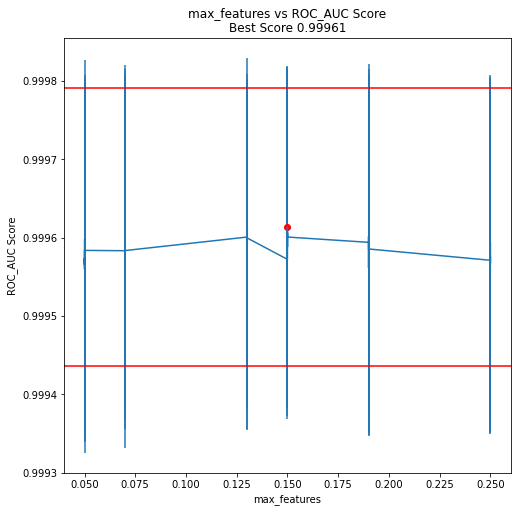

In [53]:
GridSearch_table_plot(rf_grid_search, "max_features", negative=False)

best parameters: {'max_features': 0.15, 'min_samples_split': 5, 'n_estimators': 1200}
best ROC_AUC score:      0.99961 (+/-0.00018)


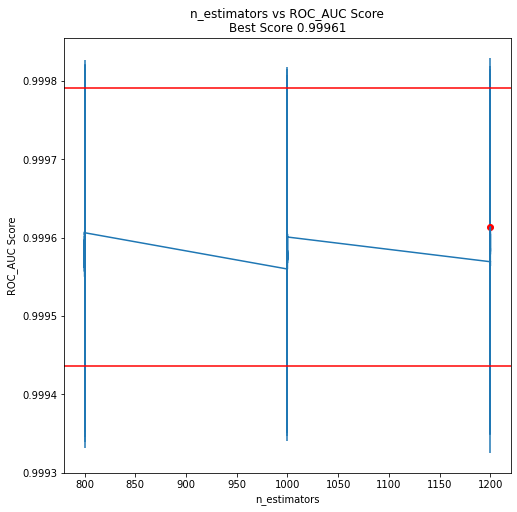

In [54]:
GridSearch_table_plot(rf_grid_search, "n_estimators", negative=False)

best parameters: {'max_features': 0.15, 'min_samples_split': 5, 'n_estimators': 1200}
best ROC_AUC score:      0.99961 (+/-0.00018)


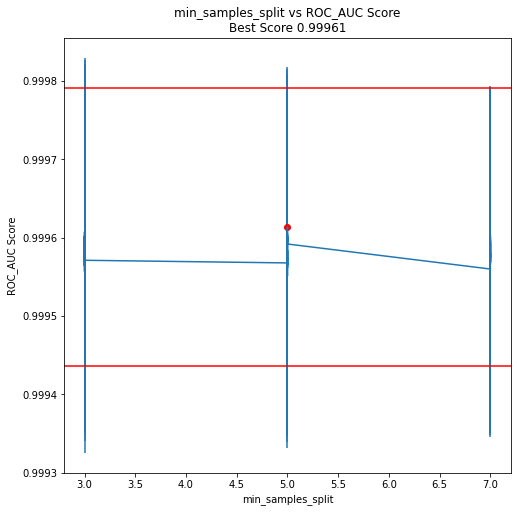

In [55]:
GridSearch_table_plot(rf_grid_search, "min_samples_split", negative=False)

### 2. Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state=0, multi_class='ovr')
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
model_stats(y_test, pred)

/home/shubhamsankpal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/shubhamsankpal/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[[770   3   0   5   0   0]
 [  2 867   1   2   1   1]
 [  0   2 475   3  10   0]
 [  1   0   0 575   0   2]
 [  1   0   0   5 910   0]
 [  2   0   0   6   1 528]]
Accuracy Score 0.9884974838245866
Classification report:               precision    recall  f1-score   support

           1       0.99      0.99      0.99       778
           2       0.99      0.99      0.99       874
           3       1.00      0.97      0.98       490
           4       0.96      0.99      0.98       578
           5       0.99      0.99      0.99       916
           6       0.99      0.98      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.988508946651472


### 2.A Grid Search

In [57]:
param_grid = {
    'C': [0.1, 1, 10, 100, 150],
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial', 'auto']
}

In [58]:
lg=LogisticRegression()
lg_grid_search=GridSearchCV(estimator=lg,param_grid=param_grid,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
lg_grid_search.fit(X_train,y_train)

Fitting 15 folds for each of 120 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 20.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 30.1min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 38.0min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 150],
                         'multi_class': ['ovr', 'multinomial', 'auto'],
                         'penalty': ['l2', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [59]:
best_grid_lg=lg_grid_search.best_estimator_
y_pred=best_grid_lg.predict(X_test)
model_stats(y_test,y_pred)

[[775   0   0   3   0   0]
 [  3 867   2   1   0   1]
 [  0   0 477   2  11   0]
 [  0   0   0 577   0   1]
 [  1   0   1   3 910   1]
 [  2   0   0   4   1 530]]
Accuracy Score 0.9911334771147855
Classification report:               precision    recall  f1-score   support

           1       0.99      1.00      0.99       778
           2       1.00      0.99      1.00       874
           3       0.99      0.97      0.98       490
           4       0.98      1.00      0.99       578
           5       0.99      0.99      0.99       916
           6       0.99      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9911322115451927


In [60]:
f1_score_lg = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_lg)

F1 Score:  0.9911322115451927


In [61]:
y_pred_lg = best_grid_lg.predict_proba(X_test)
roc_score_lg = roc_auc_score(y_test,y_pred_lg, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_lg)

ROC AUC Score:  0.998642950374108


In [62]:
cv_results = lg_grid_search.cv_results_
scores_lg_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_lg_grid.to_csv(r'lg_scores_gas.csv', index =False)

In [63]:
scores_lg_grid

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
48      13.793362      2.840835         0.058777        0.003493      10   
72      21.240475      3.314305         0.059645        0.003117     100   
96      23.444129      2.652687         0.059092        0.002421     150   
49       4.074201      0.578032         0.054875        0.005459      10   
73       4.309700      0.634722         0.056245        0.006046     100   
..            ...           ...              ...             ...     ...   
75      13.407819      0.618255         0.048625        0.008505     100   
99      13.448141      0.663507         0.048382        0.007752     150   
27      13.405885      0.626620         0.050553        0.010579       1   
31      12.109379      0.311694         0.045505        0.004298       1   
3       13.109231      0.547704         0.044145        0.008405     0.1   

   param_multi_class param_penalty param_solver  \
48               ovr            l2    newton-cg   
72               ovr            l2    newton-cg   
96               ovr            l2    newton-cg   
49               ovr            l2        lbfgs   
73               ovr            l2        lbfgs   
..               ...           ...          ...   
75               ovr            l2         saga   
99               ovr            l2         saga   
27               ovr            l2         saga   
31               ovr          none         saga   
3                ovr            l2         saga   

                                               params  split0_test_score  ...  \
48  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2...           0.998869  ...   
72  {'C': 100, 'multi_class': 'ovr', 'penalty': 'l...           0.999082  ...   
96  {'C': 150, 'multi_class': 'ovr', 'penalty': 'l...           0.999082  ...   
49  {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2...           0.998801  ...   
73  {'C': 100, 'multi_class': 'ovr', 'penalty': 'l...           0.998929  ...   
..                                                ...                ...  ...   
75  {'C': 100, 'multi_class': 'ovr', 'penalty': 'l...           0.987174  ...   
99  {'C': 150, 'multi_class': 'ovr', 'penalty': 'l...           0.987155  ...   
27  {'C': 1, 'multi_class': 'ovr', 'penalty': 'l2'...           0.987179  ...   
31  {'C': 1, 'multi_class': 'ovr', 'penalty': 'non...           0.987176  ...   
3   {'C': 0.1, 'multi_class': 'ovr', 'penalty': 'l...           0.987113  ...   

    split8_test_score  split9_test_score  split10_test_score  \
48           0.999374           0.998587            0.998431   
72           0.999180           0.998429            0.997154   
96           0.998945           0.998443            0.997138   
49           0.999111           0.998652            0.998258   
73           0.999153           0.998058            0.996494   
..                ...                ...                 ...   
75           0.985514           0.983382            0.985699   
99           0.985510           0.983389            0.985696   
27           0.985498           0.983390            0.985701   
31           0.985504           0.983368            0.985691   
3            0.985447           0.983342            0.985626   

    split11_test_score  split12_test_score  split13_test_score  \
48            0.999466            0.999348            0.998716   
72            0.999556            0.999477            0.998822   
96            0.999556            0.999447            0.998733   
49            0.999418            0.999344            0.998721   
73            0.999489            0.999436            0.998572   
..                 ...                 ...                 ...   
75            0.992485            0.986971            0.990907   
99            0.992483            0.986976            0.990911   
27            0.992481            0.986967            0.990909   
31            0.992485            0.986983            0.990910   
3         

### 2.B Evaluating the Logistic Regression Grid Search Results

best parameters: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
best ROC_AUC score:      0.99892 (+/-0.00031)


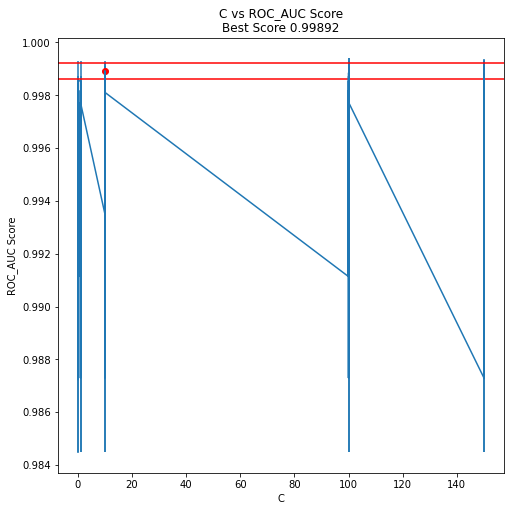

In [64]:
GridSearch_table_plot(lg_grid_search, "C", negative=False)

best parameters: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
best ROC_AUC score:      0.99892 (+/-0.00031)


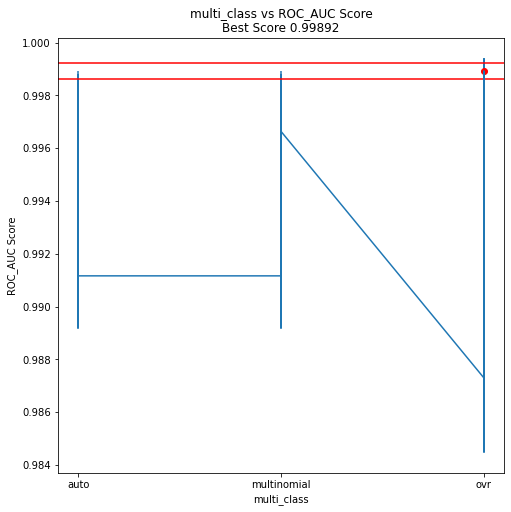

In [65]:
GridSearch_table_plot(lg_grid_search, "multi_class", negative=False)

best parameters: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
best ROC_AUC score:      0.99892 (+/-0.00031)


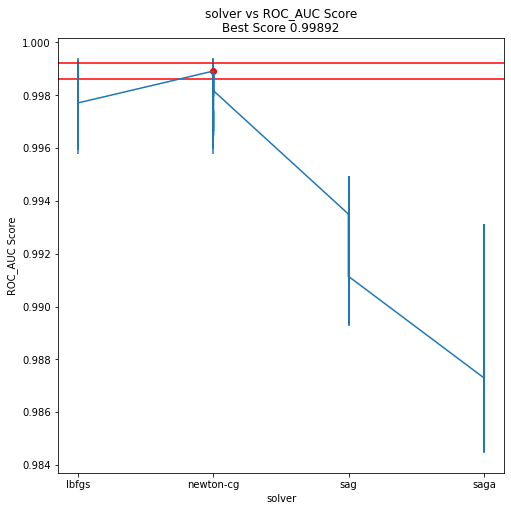

In [66]:
GridSearch_table_plot(lg_grid_search, "solver", negative=False)

best parameters: {'C': 10, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
best ROC_AUC score:      0.99892 (+/-0.00031)


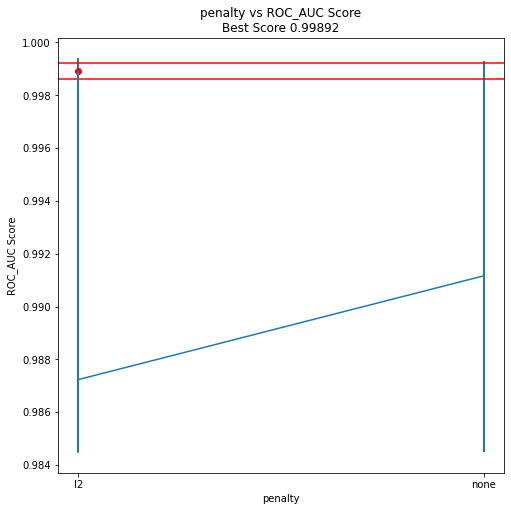

In [67]:
GridSearch_table_plot(lg_grid_search, "penalty", negative=False)

### 3. SVM

In [68]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[762   3   3   6   4   0]
 [  3 870   0   0   0   1]
 [  1  34 442   2  11   0]
 [  2   0   0 571   0   5]
 [  6   1   0   2 907   0]
 [  1   0   0   3   6 527]]
Accuracy Score 0.9774742391564821
Classification report:               precision    recall  f1-score   support

           1       0.98      0.98      0.98       778
           2       0.96      1.00      0.98       874
           3       0.99      0.90      0.95       490
           4       0.98      0.99      0.98       578
           5       0.98      0.99      0.98       916
           6       0.99      0.98      0.99       537

    accuracy                           0.98      4173
   macro avg       0.98      0.97      0.98      4173
weighted avg       0.98      0.98      0.98      4173

F1 Score 0.9772980428524909


### 3.A SVM Grid Search

In [69]:
from sklearn.model_selection import GridSearchCV
C = [0.001,0.01,0.1,1,10,100,1000]
kernel = ['linear', 'rbf']
gamma = [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto']
decision_function_shape = ['ovo', 'ovr']
svm_grid = {'C': C,
               'kernel': kernel,
               'gamma':gamma,
               'decision_function_shape': decision_function_shape}
print(svm_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'rbf'], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'], 'decision_function_shape': ['ovo', 'ovr']}


In [70]:
sv = SVC()
sv_gridcv=GridSearchCV(estimator=sv,param_grid=svm_grid,cv=rskf,n_jobs=-1,verbose=2,refit = True)
sv_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 196 candidates, totalling 2940 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 34.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 47.9min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 58.1min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 65.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 71.8min
[Parallel(n_jobs=-1)]: Done 2940 out of 2940 | elapsed: 74.1min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['linear', 'rbf']},
             verbose=2)

In [71]:
best_grid_sv=sv_gridcv.best_estimator_
y_pred=best_grid_sv.predict(X_test)
model_stats(y_test,y_pred)

[[777   0   0   0   1   0]
 [  3 869   1   0   0   1]
 [  1   1 483   0   5   0]
 [  0   0   0 577   0   1]
 [  2   0   1   0 913   0]
 [  2   0   0   2   0 533]]
Accuracy Score 0.9949676491732566
Classification report:               precision    recall  f1-score   support

           1       0.99      1.00      0.99       778
           2       1.00      0.99      1.00       874
           3       1.00      0.99      0.99       490
           4       1.00      1.00      1.00       578
           5       0.99      1.00      1.00       916
           6       1.00      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       1.00      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9949660321791273


In [72]:
f1_score_sv = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_sv)

F1 Score:  0.9949660321791273


In [73]:
cv_results = sv_gridcv.cv_results_
scores_sv_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_sv_grid.to_csv(r'sv_scores_gas.csv', index =False)

### 3.B Evaluating the Support Vector Machine Grid Search Results

best parameters: {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
best ROC_AUC score:      0.99478 (+/-0.00156)


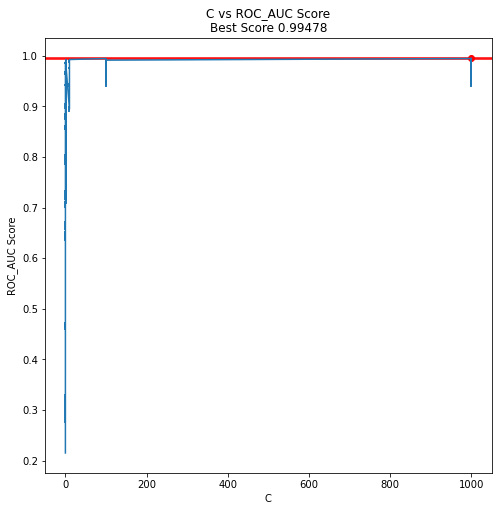

In [74]:
GridSearch_table_plot(sv_gridcv, "C", negative=False)

best parameters: {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
best ROC_AUC score:      0.99478 (+/-0.00156)


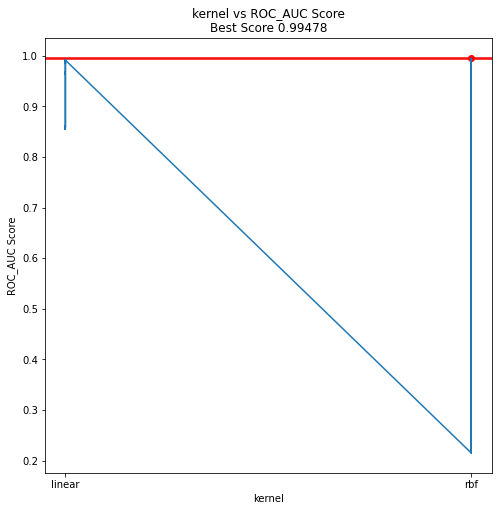

In [75]:
GridSearch_table_plot(sv_gridcv, "kernel", negative=False)

best parameters: {'C': 1000, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'rbf'}
best ROC_AUC score:      0.99478 (+/-0.00156)


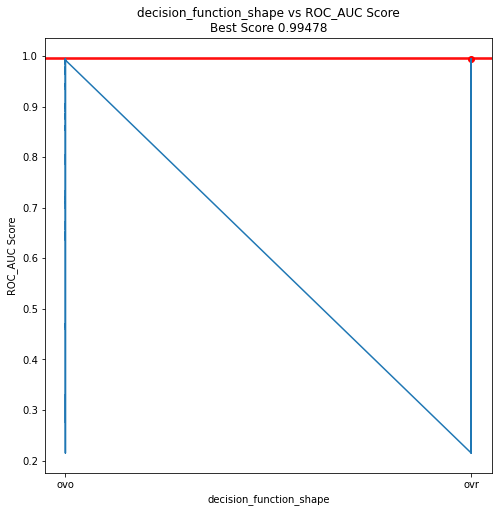

In [76]:
GridSearch_table_plot(sv_gridcv, "decision_function_shape", negative=False)

### 4. XG Boost

In [77]:
from xgboost import XGBClassifier
classifier= XGBClassifier(objective= 'multi:softmax')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
model_stats(y_test,y_pred)

[[777   0   0   0   1   0]
 [  1 872   0   0   1   0]
 [  1   2 477   1   9   0]
 [  0   0   0 575   0   3]
 [  0   0   0   2 914   0]
 [  3   0   0   0   0 534]]
Accuracy Score 0.9942487419122933
Classification report:               precision    recall  f1-score   support

           1       0.99      1.00      1.00       778
           2       1.00      1.00      1.00       874
           3       1.00      0.97      0.99       490
           4       0.99      0.99      0.99       578
           5       0.99      1.00      0.99       916
           6       0.99      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9942372597305218


### 4.A XGB Grid Search

In [78]:
max_dept = [4,5,7,9]
min_child_weight = [4,5,6]
gamma = [0,1,2,3,4]
reg_alpha = [0, 0.001, 0.005, 0.01, 0.05]
objective = ['multi:softmax']
num_class = [7]

hyperparameters = {
        "max_depth":max_dept,
        "min_child_weight":min_child_weight,
        "gamma":gamma,
        "objective": objective,
        "num_class" : num_class,
        "reg_alpha":reg_alpha
        }
print(hyperparameters)

{'max_depth': [4, 5, 7, 9], 'min_child_weight': [4, 5, 6], 'gamma': [0, 1, 2, 3, 4], 'objective': ['multi:softmax'], 'num_class': [7], 'reg_alpha': [0, 0.001, 0.005, 0.01, 0.05]}


In [79]:
xg = XGBClassifier()
xg_gridcv=GridSearchCV(estimator=xg,param_grid=hyperparameters,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
xg_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 300 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 35.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 64.1min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 105.1min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 168.5min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed: 248.1min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed: 351.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 468.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 605.2min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 701.3min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=No...
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None)

In [80]:
best_grid_xg=xg_gridcv.best_estimator_
y_pred=best_grid_xg.predict(X_test)
model_stats(y_test,y_pred)

[[774   0   0   2   1   1]
 [  1 872   0   0   1   0]
 [  1   2 479   0   8   0]
 [  1   0   1 575   0   1]
 [  0   0   0   5 911   0]
 [  3   0   0   0   0 534]]
Accuracy Score 0.9932901988976756
Classification report:               precision    recall  f1-score   support

           1       0.99      0.99      0.99       778
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99       490
           4       0.99      0.99      0.99       578
           5       0.99      0.99      0.99       916
           6       1.00      0.99      1.00       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9932853793425209


In [81]:
f1_score_xg = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_xg)

F1 Score:  0.9932853793425209


In [82]:
y_pred_xg = best_grid_xg.predict_proba(X_test)
roc_score_xg = roc_auc_score(y_test,y_pred_xg, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_xg)

ROC AUC Score:  0.9995585589600022


In [83]:
cv_results = xg_gridcv.cv_results_
scores_xg_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_xg_grid.to_csv(r'xg_scores_gas.csv', index =False)

### 4.B Evaluating the XG Boost Grid Search Results

best parameters: {'gamma': 0, 'max_depth': 9, 'min_child_weight': 6, 'num_class': 7, 'objective': 'multi:softmax', 'reg_alpha': 0.01}
best ROC_AUC score:      0.99960 (+/-0.00022)


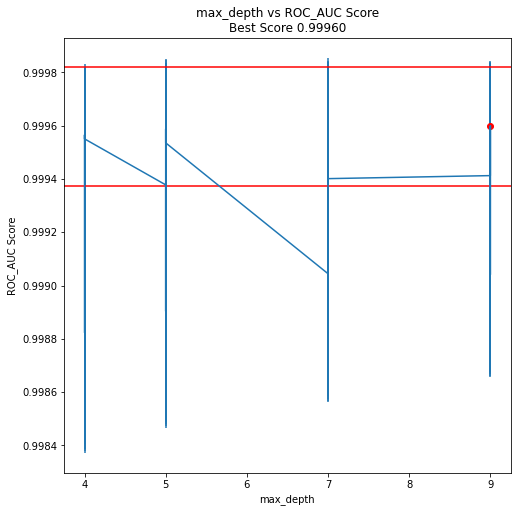

In [84]:
GridSearch_table_plot(xg_gridcv, "max_depth", negative=False)

best parameters: {'gamma': 0, 'max_depth': 9, 'min_child_weight': 6, 'num_class': 7, 'objective': 'multi:softmax', 'reg_alpha': 0.01}
best ROC_AUC score:      0.99960 (+/-0.00022)


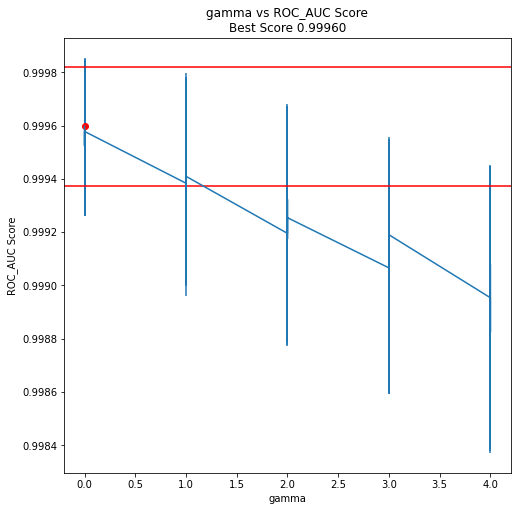

In [85]:
GridSearch_table_plot(xg_gridcv, "gamma", negative=False)

best parameters: {'gamma': 0, 'max_depth': 9, 'min_child_weight': 6, 'num_class': 7, 'objective': 'multi:softmax', 'reg_alpha': 0.01}
best ROC_AUC score:      0.99960 (+/-0.00022)


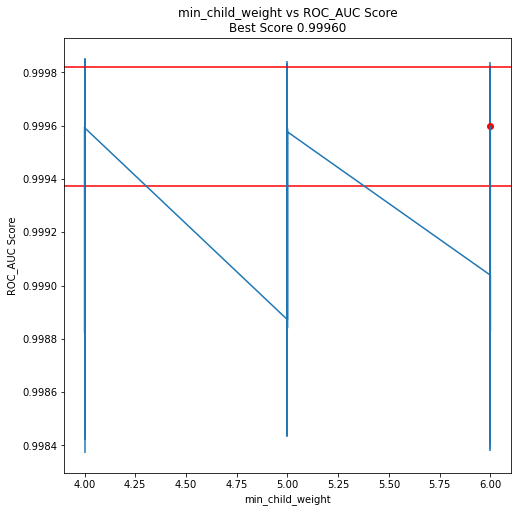

In [86]:
GridSearch_table_plot(xg_gridcv, "min_child_weight", negative=False)

best parameters: {'gamma': 0, 'max_depth': 9, 'min_child_weight': 6, 'num_class': 7, 'objective': 'multi:softmax', 'reg_alpha': 0.01}
best ROC_AUC score:      0.99960 (+/-0.00022)


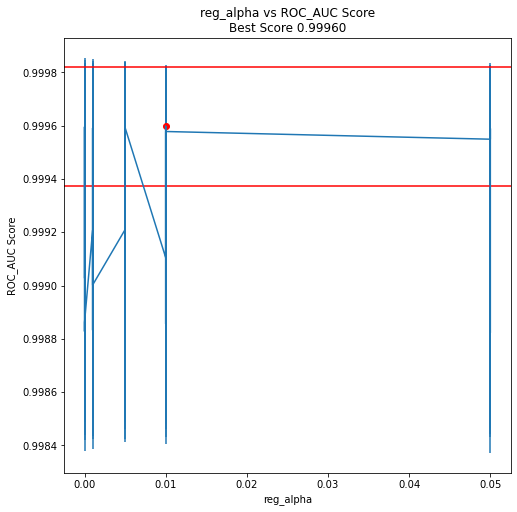

In [87]:
GridSearch_table_plot(xg_gridcv, "reg_alpha", negative=False)

### 5. Naive Bayes

In [88]:
y_train.unique()

[2, 1, 5, 3, 4, 6]
Categories (6, object): [1 < 2 < 3 < 4 < 5 < 6]

In [89]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train)
y_pred = model.predict(X_test)
model_stats(y_test,y_pred)

[[419   1  19 172  68  99]
 [ 22 523 153  13  18 145]
 [  1   2 253  19  18 197]
 [ 44   0   0 215  14 305]
 [  6   0   0 164 507 239]
 [  0   0   1  63  13 460]]
Accuracy Score 0.5696141864366163
Classification report:               precision    recall  f1-score   support

           1       0.85      0.54      0.66       778
           2       0.99      0.60      0.75       874
           3       0.59      0.52      0.55       490
           4       0.33      0.37      0.35       578
           5       0.79      0.55      0.65       916
           6       0.32      0.86      0.46       537

    accuracy                           0.57      4173
   macro avg       0.65      0.57      0.57      4173
weighted avg       0.70      0.57      0.60      4173

F1 Score 0.5959872899449816


### 5.A NB Grid Search

In [90]:
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [91]:
nb = GaussianNB()
nb_gridcv=GridSearchCV(estimator=nb,param_grid=params_NB,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
nb_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done 1485 out of 1500 | elapsed:   29.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   29.7s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.579...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [92]:
best_grid_nb=nb_gridcv.best_estimator_
y_pred=best_grid_nb.predict(X_test)
model_stats(y_test,y_pred)

[[418   1  20 172  68  99]
 [ 22 520 151  17  18 146]
 [  1   2 257  17  18 195]
 [ 45   0   0 214  14 305]
 [  5   0   1 163 507 240]
 [  0   0   1  63  13 460]]
Accuracy Score 0.5693745506829619
Classification report:               precision    recall  f1-score   support

           1       0.85      0.54      0.66       778
           2       0.99      0.59      0.74       874
           3       0.60      0.52      0.56       490
           4       0.33      0.37      0.35       578
           5       0.79      0.55      0.65       916
           6       0.32      0.86      0.46       537

    accuracy                           0.57      4173
   macro avg       0.65      0.57      0.57      4173
weighted avg       0.70      0.57      0.60      4173

F1 Score 0.5957396222286973


In [93]:
f1_score_nb = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_nb)

F1 Score:  0.5957396222286973


In [94]:
y_pred_nb = best_grid_nb.predict_proba(X_test)
roc_score_nb = roc_auc_score(y_test,y_pred_nb, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_nb)

ROC AUC Score:  0.8393021877515789


In [95]:
cv_results = nb_gridcv.cv_results_
scores_nb_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_nb_grid.to_csv(r'nb_scores_gas.csv', index =False)

### 5.B Evaluating the Naive Bayes Grid Search Results

best parameters: {'var_smoothing': 0.0002310129700083158}
best ROC_AUC score:      0.83770 (+/-0.00385)


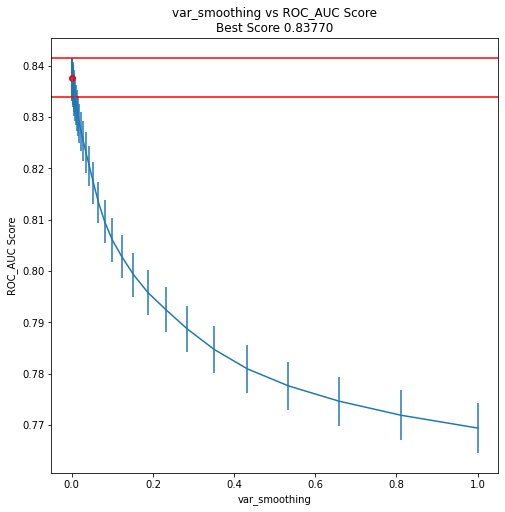

In [96]:
GridSearch_table_plot(nb_gridcv, "var_smoothing", negative=False)

### 6. KNN

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)
model_stats(y_test,knn_predictions)

[[769   6   0   1   1   1]
 [  3 867   1   0   2   1]
 [  0   2 479   0   9   0]
 [  5   0   0 568   0   5]
 [  5   0   0   1 908   2]
 [  3   0   0   1   2 531]]
Accuracy Score 0.9877785765636233
Classification report:               precision    recall  f1-score   support

           1       0.98      0.99      0.98       778
           2       0.99      0.99      0.99       874
           3       1.00      0.98      0.99       490
           4       0.99      0.98      0.99       578
           5       0.98      0.99      0.99       916
           6       0.98      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9877823184494672


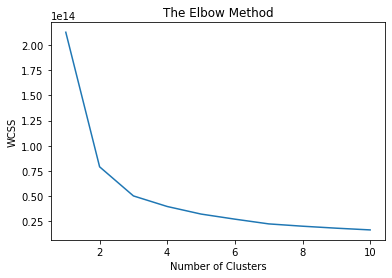

In [98]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### 6.A KNN Grid Search

In [99]:
grid_params = {
    'n_neighbors': [3,4,5,7,9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [100]:
kn = KNeighborsClassifier()
kn_gridcv=GridSearchCV(estimator=kn,param_grid=grid_params,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
kn_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 20 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 4, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [101]:
best_grid_kn=kn_gridcv.best_estimator_
y_pred=best_grid_kn.predict(X_test)
model_stats(y_test,y_pred)

[[775   0   0   2   1   0]
 [  0 872   1   0   0   1]
 [  0   3 480   0   7   0]
 [  0   0   0 575   0   3]
 [  0   0   0   1 913   2]
 [  1   1   0   1   4 530]]
Accuracy Score 0.9932901988976756
Classification report:               precision    recall  f1-score   support

           1       1.00      1.00      1.00       778
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99       490
           4       0.99      0.99      0.99       578
           5       0.99      1.00      0.99       916
           6       0.99      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9932862469051049


In [102]:
f1_score_kn = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_kn)

F1 Score:  0.9932862469051049


In [103]:
y_pred_kn= best_grid_kn.predict_proba(X_test)
roc_score_kn = roc_auc_score(y_test,y_pred_kn, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_kn)

ROC AUC Score:  0.9982340472688536


In [104]:
cv_results = kn_gridcv.cv_results_
scores_kn_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_kn_grid.to_csv(r'kn_scores_gas.csv', index =False)

### 6.B Evaluating the K-Nearest Neighbour Grid Search Results

best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
best ROC_AUC score:      0.99832 (+/-0.00050)


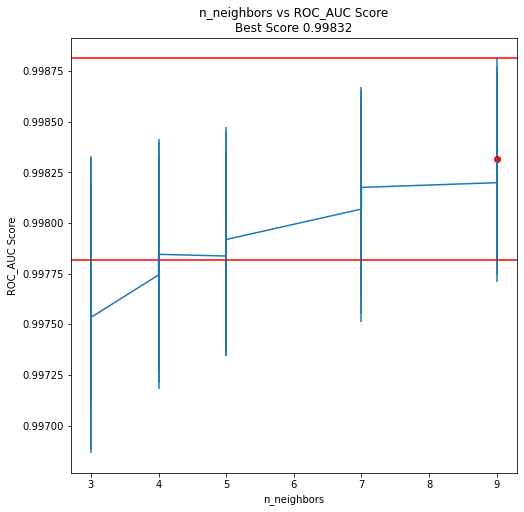

In [105]:
GridSearch_table_plot(kn_gridcv, "n_neighbors", negative=False)

best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
best ROC_AUC score:      0.99832 (+/-0.00050)


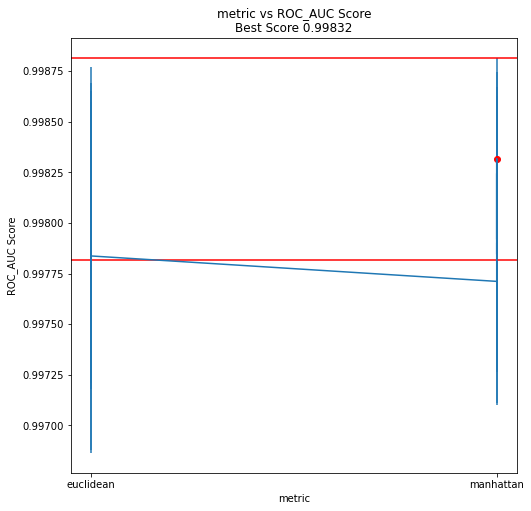

In [106]:
GridSearch_table_plot(kn_gridcv, "metric", negative=False)

best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
best ROC_AUC score:      0.99832 (+/-0.00050)


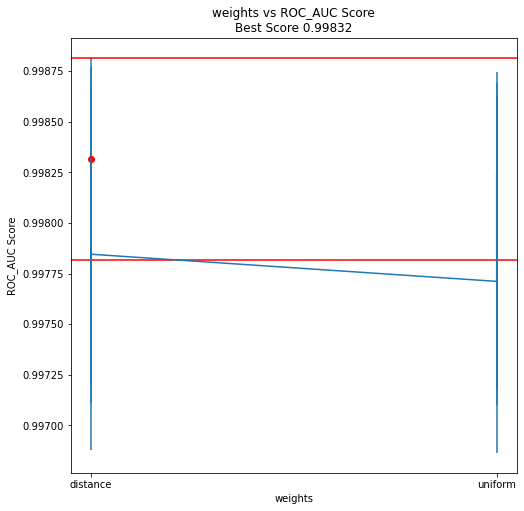

In [107]:
GridSearch_table_plot(kn_gridcv, "weights", negative=False)

### 7. ADA Boost

In [108]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[610   1   3 131  18  15]
 [ 39 739  65  21  10   0]
 [ 11 143 296  24  16   0]
 [ 28   2   0 430  21  97]
 [139  36   0  13 713  15]
 [  3   1   0 122  32 379]]
Accuracy Score 0.7589264318236281
Classification report:               precision    recall  f1-score   support

           1       0.73      0.78      0.76       778
           2       0.80      0.85      0.82       874
           3       0.81      0.60      0.69       490
           4       0.58      0.74      0.65       578
           5       0.88      0.78      0.83       916
           6       0.75      0.71      0.73       537

    accuracy                           0.76      4173
   macro avg       0.76      0.74      0.75      4173
weighted avg       0.77      0.76      0.76      4173

F1 Score 0.7603903750358187


### 7.A ADA Grid Search

In [109]:
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate' : [0.01,0.05,0.1,0.3,1],
    'algorithm': ['SAMME', 'SAMME.R']
 }

In [110]:
ab = AdaBoostClassifier()
ab_gridcv=GridSearchCV(estimator=ab,param_grid=param_dist,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
ab_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   49.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 15.8min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [111]:
best_grid_ab=ab_gridcv.best_estimator_
y_pred=best_grid_ab.predict(X_test)
model_stats(y_test,y_pred)

[[652   4   3  95  20   4]
 [ 10 797  58   8   1   0]
 [  0 100 366  12  11   1]
 [ 29   1   0 490   7  51]
 [  9   2   0  30 857  18]
 [ 10  16   0 252  20 239]]
Accuracy Score 0.8150011981787683
Classification report:               precision    recall  f1-score   support

           1       0.92      0.84      0.88       778
           2       0.87      0.91      0.89       874
           3       0.86      0.75      0.80       490
           4       0.55      0.85      0.67       578
           5       0.94      0.94      0.94       916
           6       0.76      0.45      0.56       537

    accuracy                           0.82      4173
   macro avg       0.82      0.79      0.79      4173
weighted avg       0.83      0.82      0.81      4173

F1 Score 0.8135961737916032


In [112]:
f1_score_ab = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_ab)

F1 Score:  0.8135961737916032


In [113]:
y_pred_ab = best_grid_ab.predict_proba(X_test)
roc_score_ab = roc_auc_score(y_test,y_pred_ab, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_ab)

ROC AUC Score:  0.9491745101508823


In [114]:
cv_results = ab_gridcv.cv_results_
scores_ab_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_ab_grid.to_csv(r'ab_scores_gas.csv', index =False)

### 7.B Evaluating the ADA Boost Grid Search Results

best parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
best ROC_AUC score:      0.95126 (+/-0.00464)


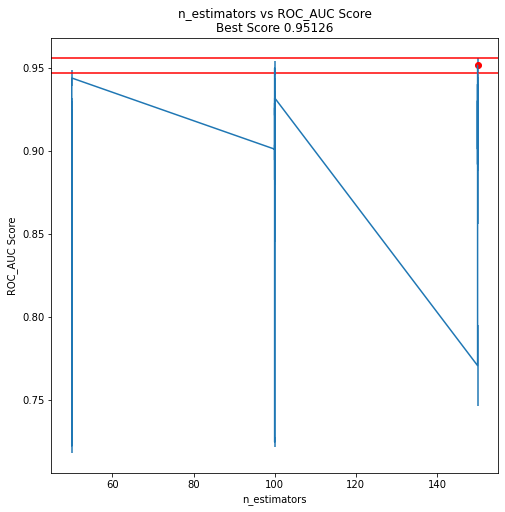

In [115]:
GridSearch_table_plot(ab_gridcv, "n_estimators", negative=False)

best parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
best ROC_AUC score:      0.95126 (+/-0.00464)


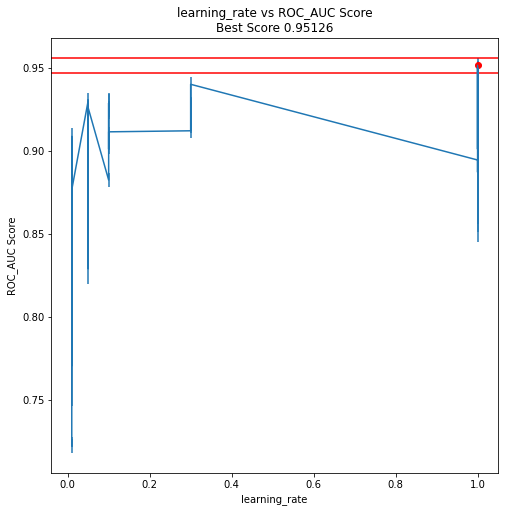

In [116]:
GridSearch_table_plot(ab_gridcv, "learning_rate", negative=False)

best parameters: {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 150}
best ROC_AUC score:      0.95126 (+/-0.00464)


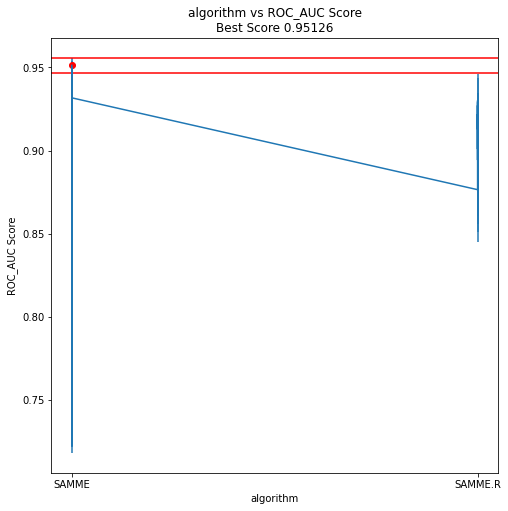

In [117]:
GridSearch_table_plot(ab_gridcv, "algorithm", negative=False)

### 8. Gradient Boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
model_stats(y_test,y_pred)

[[774   3   0   0   1   0]
 [  1 871   1   0   1   0]
 [  0   0 477   2  11   0]
 [  3   0   0 574   0   1]
 [  0   0   0   5 911   0]
 [  1   1   0   0   0 535]]
Accuracy Score 0.9925712916367122
Classification report:               precision    recall  f1-score   support

           1       0.99      0.99      0.99       778
           2       1.00      1.00      1.00       874
           3       1.00      0.97      0.99       490
           4       0.99      0.99      0.99       578
           5       0.99      0.99      0.99       916
           6       1.00      1.00      1.00       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9925641225385152


### 8.A Gradient Grid Search

In [131]:
parameters = {
    "loss":["deviance", "exponential"],
    "learning_rate": [0.1, 0.2, 1],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [133]:
gb = GradientBoostingClassifier()
rskf = RepeatedStratifiedKFold(n_splits=2, n_repeats=3)
gb_gridcv=GridSearchCV(estimator=gb,param_grid=parameters,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
gb_gridcv.fit(X_train,y_train)

Fitting 6 folds for each of 288 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   41.1s
[Parallel(n_jobs=-1)]: Done 649 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1155 tasks      | elapsed: 56.8min
[Parallel(n_jobs=-1)]: Done 1541 tasks      | elapsed: 141.9min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 161.5min finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mae'],
                         'learning_rate': [0.1, 0.2, 1],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt'], 'n_estimators': [10],
                         'subsample': [0.85, 0.9, 0.95, 1.0]},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [134]:
best_grid_gb=gb_gridcv.best_estimator_
y_pred=best_grid_gb.predict(X_test)
model_stats(y_test,y_pred)

[[774   1   0   1   2   0]
 [  0 871   1   1   1   0]
 [  0   0 478   1  11   0]
 [  0   0   0 573   2   3]
 [  0   1   1   1 913   0]
 [  0   0   0   2   1 534]]
Accuracy Score 0.9928109273903667
Classification report:               precision    recall  f1-score   support

           1       1.00      0.99      1.00       778
           2       1.00      1.00      1.00       874
           3       1.00      0.98      0.99       490
           4       0.99      0.99      0.99       578
           5       0.98      1.00      0.99       916
           6       0.99      0.99      0.99       537

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173

F1 Score 0.9928113689706098


In [135]:
f1_score_gb = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_gb)

F1 Score:  0.9928113689706098


In [136]:
y_pred_gb = best_grid_gb.predict_proba(X_test)
roc_score_gb = roc_auc_score(y_test,y_pred_gb, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_gb)

ROC AUC Score:  0.9990493388513506


In [137]:
cv_results = gb_gridcv.cv_results_
scores_gb_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_gb_grid.to_csv(r'gb_scores_gas.csv', index =False)

### 8.B Evaluating the Gradient Boosting Grid Search Results

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


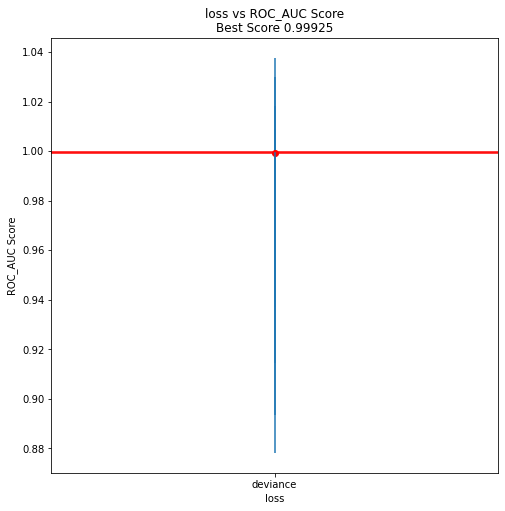

In [138]:
GridSearch_table_plot(gb_gridcv, "loss", negative=False)

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


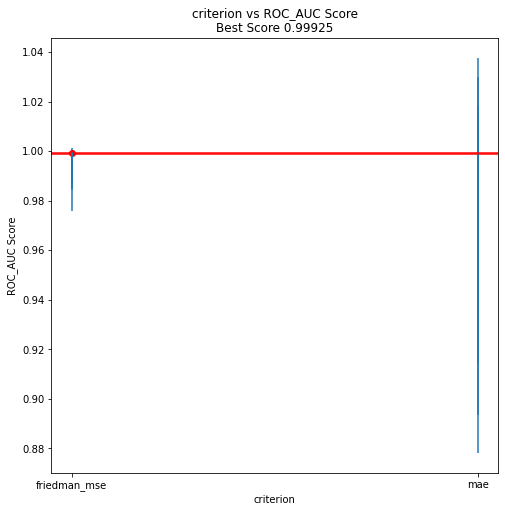

In [139]:
GridSearch_table_plot(gb_gridcv, "criterion", negative=False)

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


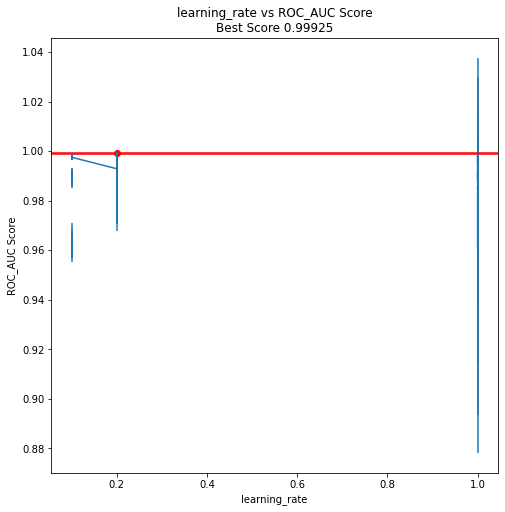

In [140]:
GridSearch_table_plot(gb_gridcv, "learning_rate", negative=False)

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


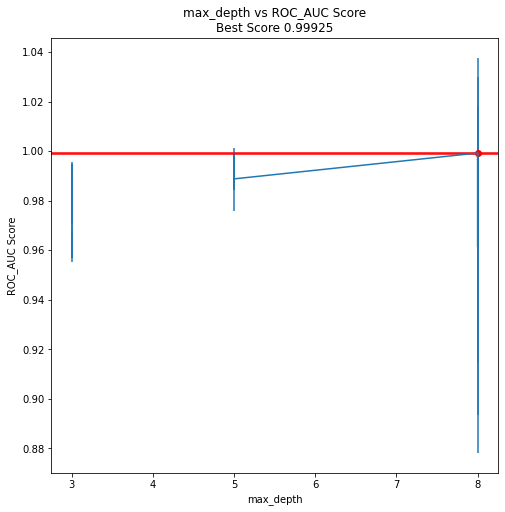

In [141]:
GridSearch_table_plot(gb_gridcv, "max_depth", negative=False)

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


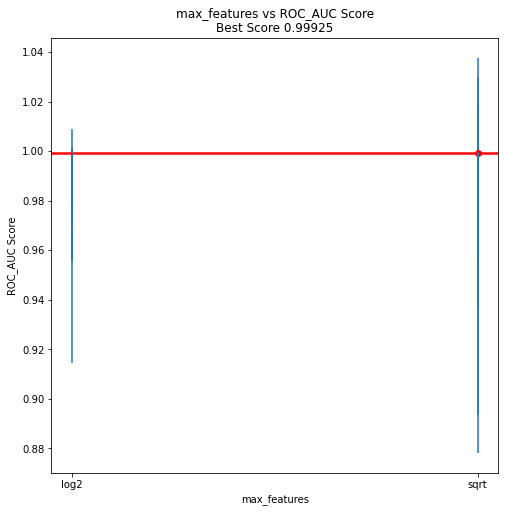

In [142]:
GridSearch_table_plot(gb_gridcv, "max_features", negative=False)

best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.2, 'loss': 'deviance', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 10, 'subsample': 0.95}
best ROC_AUC score:      0.99925 (+/-0.00020)


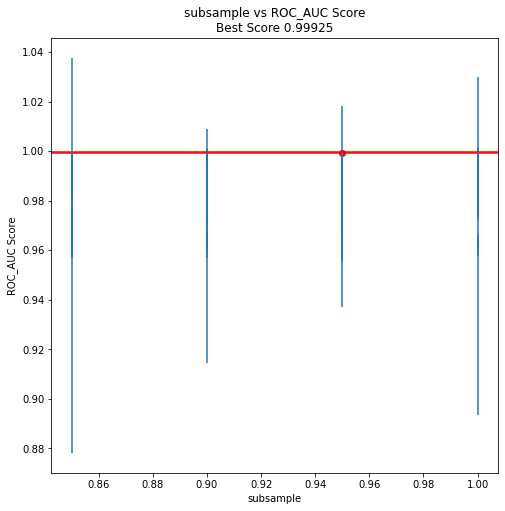

In [143]:
GridSearch_table_plot(gb_gridcv, "subsample", negative=False)

### 9. Linear Discriminant Analysis

In [120]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis(n_components = 5)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
model_stats(y_test, y_pred)

[[755   0   1  21   0   1]
 [  1 809   0  59   1   4]
 [  0   2 439  38  10   1]
 [  0   0   0 571   3   4]
 [  7   0   1  15 888   5]
 [  1   1   0  51   0 484]]
Accuracy Score 0.9456026839204409
Classification report:               precision    recall  f1-score   support

           1       0.99      0.97      0.98       778
           2       1.00      0.93      0.96       874
           3       1.00      0.90      0.94       490
           4       0.76      0.99      0.86       578
           5       0.98      0.97      0.98       916
           6       0.97      0.90      0.93       537

    accuracy                           0.95      4173
   macro avg       0.95      0.94      0.94      4173
weighted avg       0.96      0.95      0.95      4173

F1 Score 0.9476351966186463


### 9.A LDA Grid Search

In [121]:
n_components = [2, 4, 6, 10, 15]
solver = ['svd', 'lsqr', 'eigen']
shrinkage =  [0.1, 0.3, 0.5, 0.8]
search_params = {'n_components': n_components,
                'shrinkage': shrinkage,
                 'solver' :solver
                }

In [122]:
ld = LinearDiscriminantAnalysis()
ld_gridcv=GridSearchCV(estimator=ld,param_grid=search_params,cv=rskf,n_jobs=-1,verbose=2, scoring = 'roc_auc_ovo_weighted')
ld_gridcv.fit(X_train,y_train)

Fitting 15 folds for each of 60 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:    9.9s finished


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=3, random_state=None),
             estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [2, 4, 6, 10, 15],
                         'shrinkage': [0.1, 0.3, 0.5, 0.8],
                         'solver': ['svd', 'lsqr', 'eigen']},
             scoring='roc_auc_ovo_weighted', verbose=2)

In [123]:
best_grid_ld=ld_gridcv.best_estimator_
y_pred=best_grid_ld.predict(X_test)
model_stats(y_test,y_pred)

[[693   0   0  83   0   2]
 [  6 759   0 106   0   3]
 [  0   1 430  48  10   1]
 [  3   0   0 564   0  11]
 [  3   0   0  52 827  34]
 [  1   0   0  58   0 478]]
Accuracy Score 0.8988737119578241
Classification report:               precision    recall  f1-score   support

           1       0.98      0.89      0.93       778
           2       1.00      0.87      0.93       874
           3       1.00      0.88      0.93       490
           4       0.62      0.98      0.76       578
           5       0.99      0.90      0.94       916
           6       0.90      0.89      0.90       537

    accuracy                           0.90      4173
   macro avg       0.92      0.90      0.90      4173
weighted avg       0.93      0.90      0.91      4173

F1 Score 0.9059053744853092


In [124]:
f1_score_ld = f1_score(y_test,y_pred, average='weighted')
print("F1 Score: ", f1_score_ld)

F1 Score:  0.9059053744853092


In [125]:
y_pred_ld = best_grid_ld.predict_proba(X_test)
roc_score_ld = roc_auc_score(y_test,y_pred_ld, average= 'weighted', multi_class = 'ovo')
print("ROC AUC Score: " , roc_score_ld)

ROC AUC Score:  0.9907653550422767


In [126]:
cv_results = ld_gridcv.cv_results_
scores_ld_grid = pd.DataFrame(cv_results).sort_values(by='rank_test_score')
scores_ld_grid.to_csv(r'ld_scores_gas.csv', index =False)

### 9.B Evaluating the Linear Discriminant Analysis Grid Search Results

best parameters: {'n_components': 2, 'shrinkage': 0.1, 'solver': 'lsqr'}
best ROC_AUC score:      0.99166 (+/-0.00111)


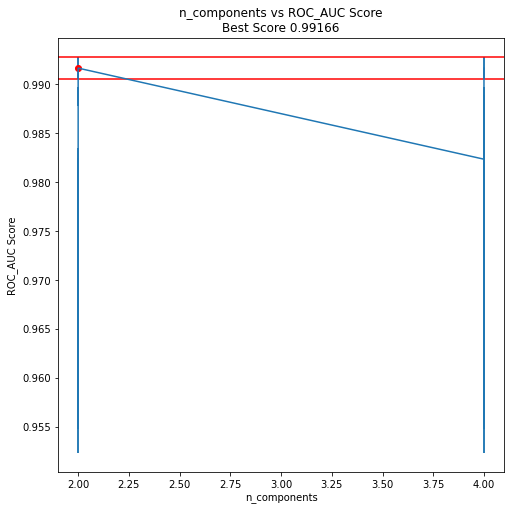

In [127]:
GridSearch_table_plot(ld_gridcv, "n_components", negative=False)

best parameters: {'n_components': 2, 'shrinkage': 0.1, 'solver': 'lsqr'}
best ROC_AUC score:      0.99166 (+/-0.00111)


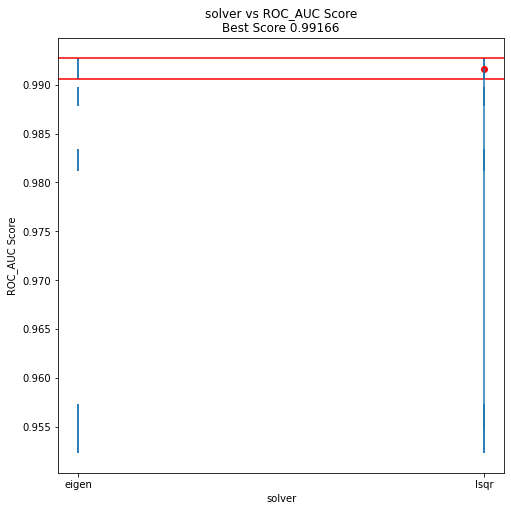

In [128]:
GridSearch_table_plot(ld_gridcv, "solver", negative=False)

best parameters: {'n_components': 2, 'shrinkage': 0.1, 'solver': 'lsqr'}
best ROC_AUC score:      0.99166 (+/-0.00111)


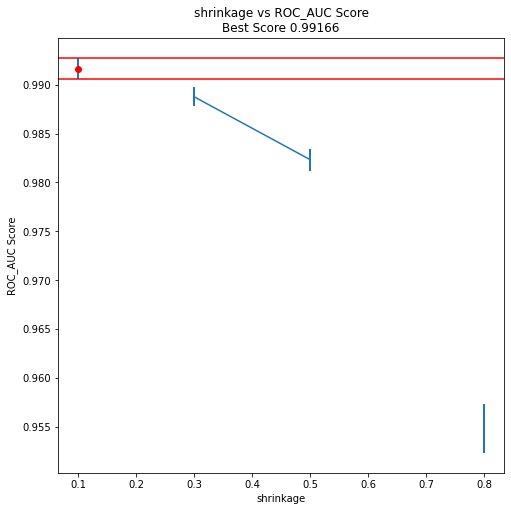

In [129]:
GridSearch_table_plot(ld_gridcv, "shrinkage", negative=False)

## Answer the following questions

### How do you prepare your dataset ?

a. Firstly, I selected the dependent and independent features from the given dataset. Then I assigned the respective column name to each independent variable as they were not having proper labels. This information was taken from the data source as it had all the column names of every independent variable.

b. Next step was to deal with the categorical variables which were present in the dependent feature ("target"). So, I checked the unique classes in the feature along with their value counts. With the help of Label Encoder technique, I assigned the respective integer value to each class (in total there were 7 classes so assigning the unique value from 0-6 to each unique class). This step is important as we have to pass numerical values to our model as it would not train with respect to categorical values.

c. Next, I created the X variable which holds the independent features and y variable that holds the target variable which depends on the independent variable.

d. Then with the help of train test split, I split the data in the 70:30 ratio between training and test sets. 

e. I used Standard Scalar for scaling the independent feature from the training and testing sets. The use of scaling is important to form parity between the values when any feature has magnitude and units so that it can be easy to adapt for the machine learning algorithm.

f. Lastly, I used Repeated stratified K fold method with 10 splits and 20 repeats. The Repeats Stratified K-Fold n times with different randomization in each repetition. The StratifiedKFold preserves the class ratios (approximately 1 / 10) in both train and test dataset. RepeatedStratifiedKFold is used to repeat Stratified K-Fold n times with different randomization in each repetition. This would solve the problem of imbalance dataset for this problem.

Note: I have not done feature selection for these projects as the primary goal of the project is to gain in-depth knowledge about the machine learning algorithm that is used along with its parameters.

### What are the good classification performance measures for your dataset ? Why?

a. Firstly for a classification problem statement, we focus on any of the following metrics to measure the performance depending on whether the dataset is the balanced or imbalanced dataset.

- Confusion matrix
- Recall
- Precision
- ROC AUC Score
- Accuracy of the model
- F1 score

b. There is no free lunch that would confirm that using any of the above can be the only metric that is to look after for performance measure. It completely depends on the problem statement and the balance of the dataset.

c. In this dataset, when I checked the counts of the 7 unique classes, the dataset looked imbalanced as the values were not at all in proportion. Following are counts of each class:

- Other_Faults:    673
- Bumps:           402
- K_Scratch:      391
- Z_Scratch:       190
- Pastry:          158
- Stains:           72
- Dirtiness:        55

d. There are methods to handle the imbalanced datasets by using techniques like upsampling and downsampling but as it was not the primary focus of the project I didn't use those techniques to solve the problem.

e. Accuracy of the model can be considered as good classification performance measure if the dataset seemed balanced but in this case, as the dataset was imbalanced I mainly focused on Precision, Recall and F1 score as good classification performance measure. 

f. ROC_AUC curve can be used to set the threshold for considering the classification but it is mostly used in binary classification. But we can extend it to multiclass classification problems by using the One vs All technique or One Vs One technique. 

g. I used the scoring metric as roc_auc_ovo_weighted for grid search. The multi-class One-vs-One scheme compares every unique pairwise combination of classes. Weighted because Calculate metrics for each label, and find their average, weighted by support (the number of true instances for each label).

h. The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

i. With reference to False Positives and False Negatives in confusion matrix of each model I decided that both are equally important in case of this problem statement as we need to classify the type of fault of steel plates. 

j. So, F1 weighted average score and ROC AUC weighted scores are the best estimators of the models here according to my knowledge. 

### What are the important parameters that should be tuned in each algorithm?

In this project I used in total 8 different machine learning algorithms and each of them having certain set of parameter that are important for tuning the model.

b. Tuning of the models completely depend on how we choose the parameters as there are variety of claues that can be given to a single parameter in an algrithm.

c. I list the algoithm and its paramaters that I felt ar eimportant and used in model tuning as follows:

- Random Forest Classifier:
    - n_estimators
    - max_features
    - min_samples_split
    
- Logistic Regression:
    - Cs
    - penalty
    - multi_class
    - solver
    
- Support vector machine
    - C
    - kernel
    - gamma
    - decision_function_shape
    
- XGBoost
    - max_depth
    - min_child_weight
    - gamma
    - objective
    - num_class
    - reg_alpha
    
- Naive Bayes
    -var_smoothing
    
- KNN
    - n_neighbours
    - weights
    - metrics
    
- ADA Boost
    - n_estimators
    - learning rate
    - algorithm
    
- Gradient Boost
    - loss"
    - learning_rate"
    - min_samples_split
    - min_samples_leaf
    - max_depth
    - max_features
    - criterion"
    - subsample
    - n_estimators
    
- Linear Discriminant Analysis
    - solver
    - n_components
    - shrinkage
    
    
- <b>Note:</b>
I have taken all the above paramaters of each algorithm too tune the model out of the available parameters in each algorithm. I developed the understanding of each parameter of the respective algorithm by reading the documentation and why exactly those parameters are needed. Also, I got to know when to use which parameter for example here in this dataset as it is a multi classification problem there are certain parameters that dosen't support for such scenario. 

###  How can you statistically prove that your results are valid?

a. The validility of the result can be checked on the basis of performance metrics of the model. 

b. If you see that after the model is fitted on the training data I use the test set to predict and then validate the data. Beacuse, the test set was not been the part of training we can get to know whether our model is generalised or not. 

c. If the values of precision, recall and F1 scores are low that means our model has misclassfied the testing data by a hue margin and vise versa.

### Conclusion

- Finally, I can say that this project was quite challenging as I have not worked prior on multiclass data containing almost 7 unique classes. 
- The model tuning and researching on parameters by understanding their use was the key highlight of this project.